In [1]:
from kervis.utils import Model
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [2]:
SP = Model("MUTAG", ShortestPath, "SVM")

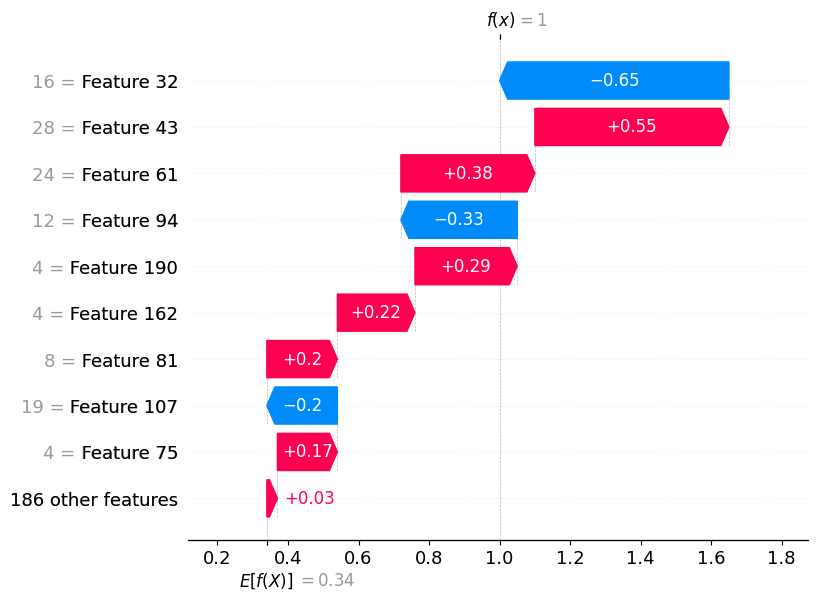

In [14]:
SP.waterfall_plot(1)

In [15]:
features = SP.find_features(1, 32)
features

[(22, 29, 6), (22, 30, 6)]

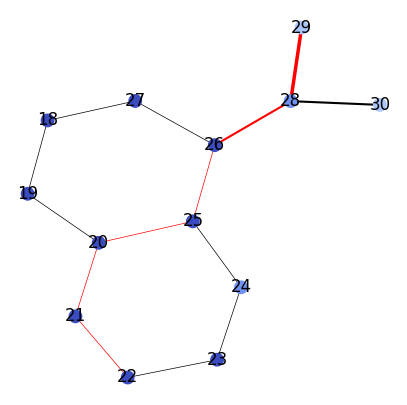

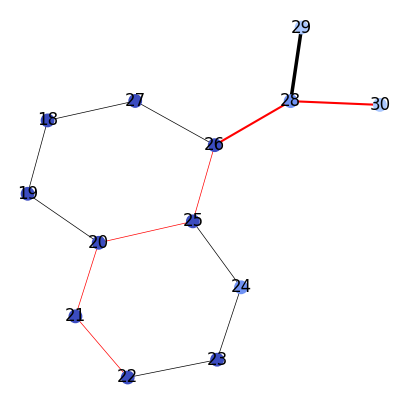

In [16]:
SP.highlight_features(1, 32, with_labels=True)